In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
pd.set_option('display.max_columns', None)

In [13]:
trips = pd.read_csv("Trips_by_Distance.csv")
trips_full = pd.read_csv("Trips_Full Data.csv")

In [3]:
trips.head()

,Level,Date,State FIPS,State Postal Code,County FIPS,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,...,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Row ID,Week,Month
0,National,1/1/2019,NaN,NaN,NaN,NaN,77433867.0,248733553.0,8.977844e+08,241667151.0,...,129670778.0,116904343.0,40432062.0,15686639.0,7525563.0,1806022.0,1728112.0,00-00000-20190101,0,1
1,National,1/2/2019,NaN,NaN,NaN,NaN,61305201.0,264862219.0,1.139452e+09,291276735.0,...,171637514.0,167412698.0,56148976.0,17739183.0,7817044.0,1962301.0,1531219.0,00-00000-20190102,0,1
2,National,1/3/2019,NaN,NaN,NaN,NaN,63050480.0,263116940.0,1.162753e+09,296375014.0,...,175775410.0,172027487.0,57632422.0,18366626.0,8124548.0,2038099.0,1567072.0,00-00000-20190103,0,1
3,National,1/4/2019,NaN,NaN,NaN,NaN,61803652.0,264363768.0,1.181954e+09,293159631.0,...,181324645.0,176144493.0,58761592.0,19315785.0,8687318.0,2096065.0,1569185.0,00-00000-20190104,0,1
4,National,1/5/2019,NaN,NaN,NaN,NaN,64389745.0,261777675.0,1.180477e+09,295459014.0,...,180941769.0,165239790.0,54842134.0,19363939.0,8490791.0,1991159.0,1438664.0,00-00000-20190105,0,1


In [4]:
trips.isnull().any()

Level                             False
Date                              False
State FIPS                         True
State Postal Code                  True
County FIPS                        True
County Name                        True
Population Staying at Home         True
Population Not Staying at Home     True
Number of Trips                    True
Number of Trips <1                 True
Number of Trips 1-3                True
Number of Trips 3-5                True
Number of Trips 5-10               True
Number of Trips 10-25              True
Number of Trips 25-50              True
Number of Trips 50-100             True
Number of Trips 100-250            True
Number of Trips 250-500            True
Number of Trips >=500              True
Row ID                            False
Week                              False
Month                             False
dtype: bool

In [5]:

# Find the row with missing value in "Number of Trips 5-10" column
missing_row = trips[trips["Number of Trips 5-10"].isnull()].iloc[66]

# Display the entire row
print("Row with missing value in 'Number of Trips 5-10' column:")
print(missing_row)

Row with missing value in 'Number of Trips 5-10' column:
Level                                        County
Date                                       1/4/2019
State FIPS                                     31.0
State Postal Code                                NE
County FIPS                                 31171.0
County Name                           Thomas County
Population Staying at Home                      NaN
Population Not Staying at Home                  NaN
Number of Trips                                 NaN
Number of Trips <1                              NaN
Number of Trips 1-3                             NaN
Number of Trips 3-5                             NaN
Number of Trips 5-10                            NaN
Number of Trips 10-25                           NaN
Number of Trips 25-50                           NaN
Number of Trips 50-100                          NaN
Number of Trips 100-250                         NaN
Number of Trips 250-500                         NaN
Number 

In [6]:
missing_rows_df = trips[trips["Number of Trips 5-10"].isnull()]
missing_rows_df

,Level,Date,State FIPS,State Postal Code,County FIPS,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,...,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Row ID,Week,Month
46154,County,1/1/2019,48.0,TX,48269.0,King County,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48-48269-20190101,0,1
46155,County,1/1/2019,2.0,AK,2164.0,Lake and Peninsula Borough,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,02-02164-20190101,0,1
46159,County,1/1/2019,2.0,AK,2282.0,Yakutat City and Borough,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,02-02282-20190101,0,1
46160,County,1/1/2019,2.0,AK,2230.0,Skagway Municipality,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,02-02230-20190101,0,1
46161,County,1/1/2019,31.0,NE,31005.0,Arthur County,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31-31005-20190101,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048397,County,11/12/2019,53.0,WA,53069.0,Wahkiakum County,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53-53069-20191112,45,11
1048460,County,11/12/2019,2.0,AK,2282.0,Yakutat City and Borough,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,02-02282-20191112,45,11
1048492,County,11/12/2019,2.0,AK,2290.0,Yukon-Koyukuk Census Area,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,02-02290-20191112,45,11
1048515,County,11/3/2019,30.0,MT,30055.0,McCone County,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30-30055-20191103,44,11


In [17]:
trips_filtered = trips.drop(columns=["State FIPS", "State Postal Code", "County FIPS", "County Name"])

In [18]:
trips_filtered.head()

,Level,Date,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,Number of Trips 1-3,Number of Trips 3-5,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Row ID,Week,Month
0,National,1/1/2019,77433867.0,248733553.0,8.977844e+08,241667151.0,234284795.0,108078903.0,129670778.0,116904343.0,40432062.0,15686639.0,7525563.0,1806022.0,1728112.0,00-00000-20190101,0,1
1,National,1/2/2019,61305201.0,264862219.0,1.139452e+09,291276735.0,285887315.0,138039296.0,171637514.0,167412698.0,56148976.0,17739183.0,7817044.0,1962301.0,1531219.0,00-00000-20190102,0,1
2,National,1/3/2019,63050480.0,263116940.0,1.162753e+09,296375014.0,290074425.0,140771581.0,175775410.0,172027487.0,57632422.0,18366626.0,8124548.0,2038099.0,1567072.0,00-00000-20190103,0,1
3,National,1/4/2019,61803652.0,264363768.0,1.181954e+09,293159631.0,295643296.0,145251819.0,181324645.0,176144493.0,58761592.0,19315785.0,8687318.0,2096065.0,1569185.0,00-00000-20190104,0,1
4,National,1/5/2019,64389745.0,261777675.0,1.180477e+09,295459014.0,304168709.0,148540651.0,180941769.0,165239790.0,54842134.0,19363939.0,8490791.0,1991159.0,1438664.0,00-00000-20190105,0,1


In [20]:
trips_filtered.shape

(1048575, 18)

In [25]:
trips_filtered.dropna(inplace=True)

In [26]:
trips_filtered.shape

(1035625, 18)

In [28]:
#check if the correct data types are in each column
trips_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1035625 entries, 0 to 1048574
Data columns (total 18 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   Level                           1035625 non-null  object 
 1   Date                            1035625 non-null  object 
 2   Population Staying at Home      1035625 non-null  float64
 3   Population Not Staying at Home  1035625 non-null  float64
 4   Number of Trips                 1035625 non-null  float64
 5   Number of Trips <1              1035625 non-null  float64
 6   Number of Trips 1-3             1035625 non-null  float64
 7   Number of Trips 3-5             1035625 non-null  float64
 8   Number of Trips 5-10            1035625 non-null  float64
 9   Number of Trips 10-25           1035625 non-null  float64
 10  Number of Trips 25-50           1035625 non-null  float64
 11  Number of Trips 50-100          1035625 non-null  float64
 12  Numbe

In [33]:
trips_filtered['Date'] = pd.to_datetime(trips_filtered['Date'])

In [32]:
trips_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1035625 entries, 0 to 1048574
Data columns (total 18 columns):
 #   Column                          Non-Null Count    Dtype         
---  ------                          --------------    -----         
 0   Level                           1035625 non-null  object        
 1   Date                            1035625 non-null  datetime64[ns]
 2   Population Staying at Home      1035625 non-null  float64       
 3   Population Not Staying at Home  1035625 non-null  float64       
 4   Number of Trips                 1035625 non-null  float64       
 5   Number of Trips <1              1035625 non-null  float64       
 6   Number of Trips 1-3             1035625 non-null  float64       
 7   Number of Trips 3-5             1035625 non-null  float64       
 8   Number of Trips 5-10            1035625 non-null  float64       
 9   Number of Trips 10-25           1035625 non-null  float64       
 10  Number of Trips 25-50           1035625 non-nul

In [42]:
trips_full.head()

,Month of Date,Week of Date,Year of Date,Level,Date,Week Ending Date,Trips <1 Mile,People Not Staying at Home,Population Staying at Home,Trips,...,Trips 10-25 Miles,Trips 100-250 Miles,Trips 100+ Miles,Trips 25-100 Miles,Trips 25-50 Miles,Trips 250-500 Miles,Trips 3-5 Miles,Trips 5-10 Miles,Trips 50-100 Miles,Trips 500+ Miles
0,August,Week 32,2019,National,8/4/2019 0:00,10-Aug-19,292959749,258404133,67763287,1322685497,...,200922270,8595827,15338786,79429125,59517188,2273613,171336406,216121882,19911937,4469346
1,August,Week 32,2019,National,8/5/2019 0:00,10-Aug-19,317133861,262199758,63967662,1412564488,...,228809869,6535920,12563068,86004297,68184743,1941260,178996059,231048425,17819554,4085888
2,August,Week 32,2019,National,8/6/2019 0:00,10-Aug-19,324443205,260096133,66071287,1437762102,...,235621127,5993704,11104823,87599579,70149166,1741994,179210645,233248732,17450413,3369125
3,August,Week 32,2019,National,8/7/2019 0:00,10-Aug-19,358483024,258878802,67288618,1543710309,...,249988663,5379881,8528574,92200386,74381367,1272248,189163336,243872277,17819019,1876445
4,August,Week 32,2019,National,8/8/2019 0:00,10-Aug-19,300765870,262410045,63757375,1382044815,...,226055368,6259735,12892348,84193587,66724543,1957888,179346163,230933709,17469044,4674725


In [45]:
# Check the first and last date
first_date = trips_filtered['Date'].min()
last_date = trips_filtered['Date'].max()

# Display the first and last date
print("First date:", first_date)
print("Last date:", last_date)

First date: 2019-01-01 00:00:00
Last date: 2022-02-06 00:00:00


In [48]:
#sort by date
trips_filtered = trips_filtered.sort_values(by='Date', ascending=True)

In [81]:
trips_filtered['Level'].value_counts()

Level
County      988773
State        45951
National       901
Name: count, dtype: int64

In [89]:
trips_filtered_national = trips_filtered[trips_filtered["Level"] == "National"]
trips_filtered_state = trips_filtered[trips_filtered["Level"] == "State"]
trips_filtered_county = trips_filtered[trips_filtered["Level"] == "County"]

In [90]:
# Group by 'Week' and calculate the mean of 'Population Staying at Home'
mean_population_at_home_national = trips_filtered_national.groupby(by='Week')['Population Staying at Home'].mean()
mean_population_at_home_state = trips_filtered_state.groupby(by='Week')['Population Staying at Home'].mean()
mean_population_at_home_county = trips_filtered_county.groupby(by='Week')['Population Staying at Home'].mean()

In [ ]:
# Plot the histogram
mean_population_at_home_national.plot(kind='bar', figsize=(10, 6), color='skyblue')

# Customize the plot
plt.title('National Mean Population Staying at Home by Week')
plt.xlabel('Week')
plt.ylabel('Mean Population Staying at Home')
plt.xticks(rotation=90)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Plot the histogram
mean_population_at_home_national.plot(kind='bar', figsize=(10, 6), color='skyblue')

# Customize the plot
plt.title('National Mean Population Staying at Home by Week')
plt.xlabel('Week')
plt.ylabel('Mean Population Staying at Home')
plt.xticks(rotation=90)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Plot the histogram
mean_population_at_home_national.plot(kind='bar', figsize=(10, 6), color='skyblue')

# Customize the plot
plt.title('National Mean Population Staying at Home by Week')
plt.xlabel('Week')
plt.ylabel('Mean Population Staying at Home')
plt.xticks(rotation=90)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

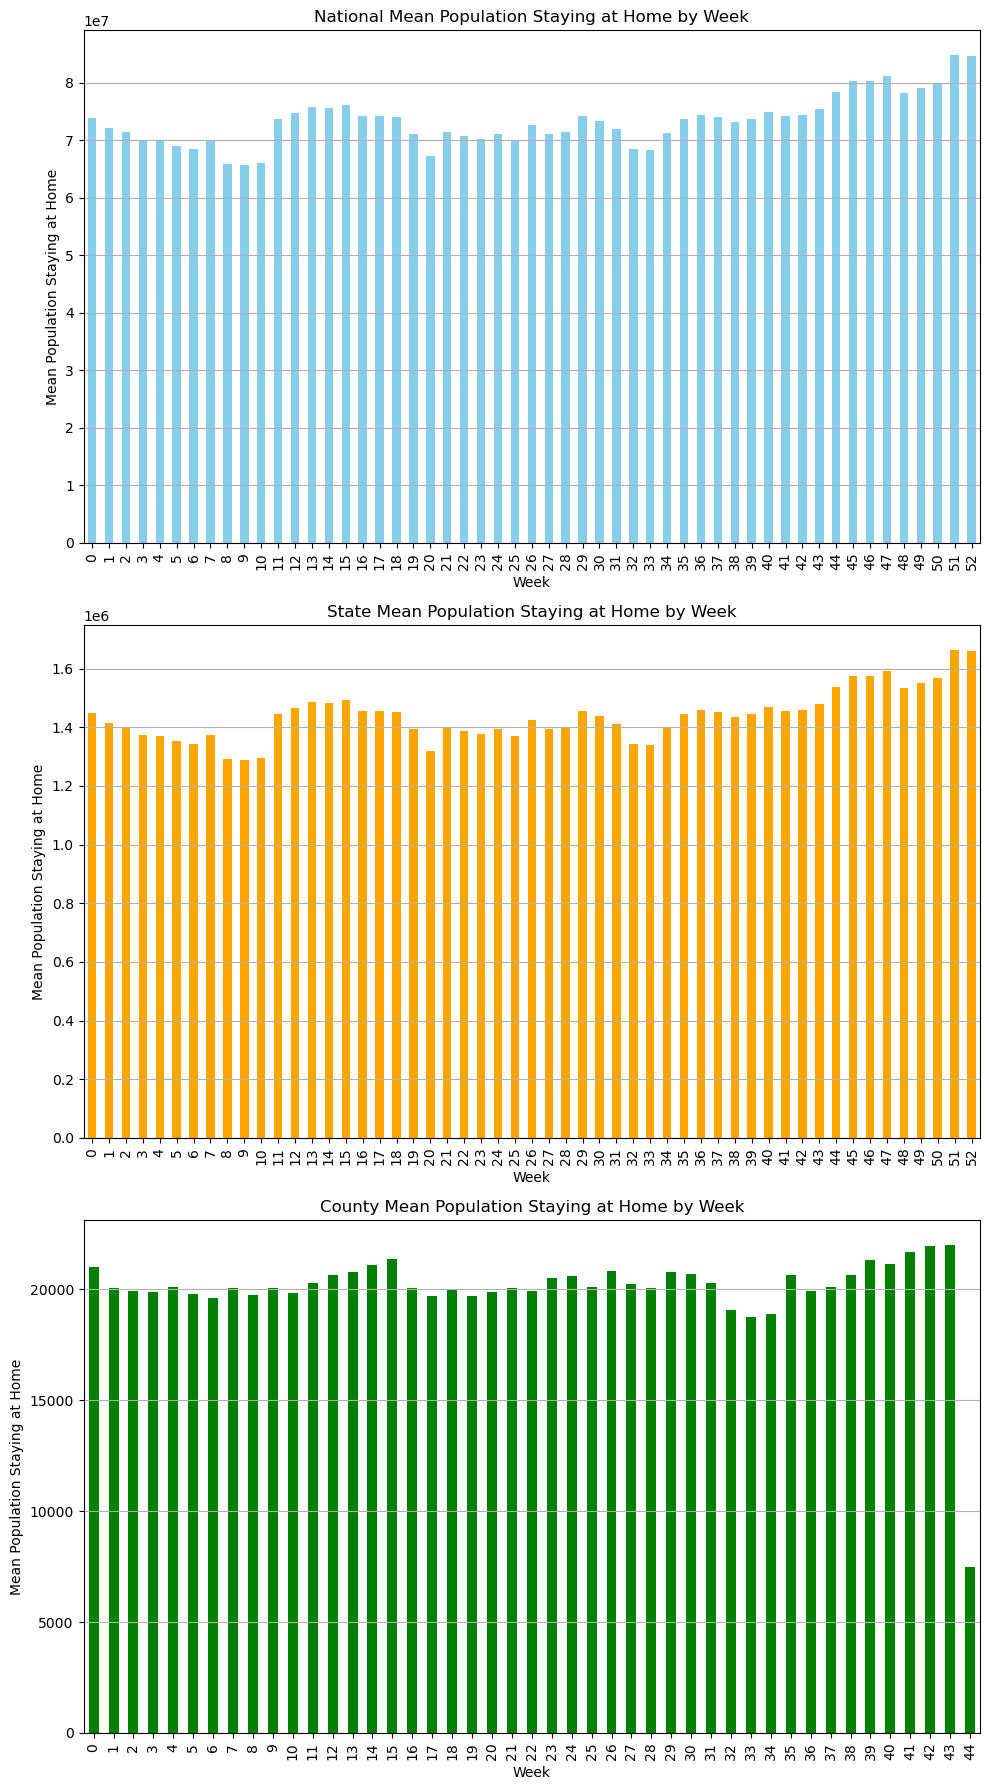

In [91]:

# Assuming mean_population_at_home_national, mean_population_at_home_state, and mean_population_at_home_county are already calculated

# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 18))

# Plot national data
mean_population_at_home_national.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('National Mean Population Staying at Home by Week')
axes[0].set_xlabel('Week')
axes[0].set_ylabel('Mean Population Staying at Home')
axes[0].tick_params(axis='x', rotation=90)
axes[0].grid(axis='y')

# Plot state data
mean_population_at_home_state.plot(kind='bar', ax=axes[1], color='orange')
axes[1].set_title('State Mean Population Staying at Home by Week')
axes[1].set_xlabel('Week')
axes[1].set_ylabel('Mean Population Staying at Home')
axes[1].tick_params(axis='x', rotation=90)
axes[1].grid(axis='y')

# Plot county data
mean_population_at_home_county.plot(kind='bar', ax=axes[2], color='green')
axes[2].set_title('County Mean Population Staying at Home by Week')
axes[2].set_xlabel('Week')
axes[2].set_ylabel('Mean Population Staying at Home')
axes[2].tick_params(axis='x', rotation=90)
axes[2].grid(axis='y')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [77]:
trips_filtered[trips_filtered["Week"] == 40].head()

,Level,Date,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,Number of Trips 1-3,Number of Trips 3-5,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Row ID,Week,Month
966131,County,2019-10-06,156306.0,712401.0,4430847.0,1294488.0,1254879.0,549271.0,681013.0,482087.0,76890.0,52819.0,30917.0,7000.0,1483.0,48-48215-20191006,40,10
966132,County,2019-10-06,7745.0,28904.0,100611.0,18555.0,19582.0,14593.0,10136.0,19144.0,12753.0,4383.0,1185.0,180.0,100.0,48-48217-20191006,40,10
966133,County,2019-10-06,5013.0,18008.0,59923.0,13348.0,19922.0,6853.0,2738.0,6885.0,7068.0,2266.0,774.0,54.0,15.0,48-48219-20191006,40,10
966134,County,2019-10-06,13957.0,47686.0,150202.0,17915.0,25070.0,54821.0,19887.0,11860.0,15214.0,4091.0,1176.0,113.0,55.0,48-48221-20191006,40,10
966135,County,2019-10-06,6745.0,30339.0,123846.0,23060.0,38842.0,9688.0,11906.0,22617.0,10400.0,5049.0,1843.0,410.0,31.0,48-48223-20191006,40,10


In [51]:
trips_filtered['Week'].nunique()
#group the average Population Staying at Home per month
trips_filtered.groupby(by = 'Week')['Population Staying at Home'].mean()


Week
0     1.204752e+05
1     1.511653e+05
2     1.495038e+05
3     1.468154e+05
4     1.467504e+05
5     1.449985e+05
6     1.435468e+05
7     1.469490e+05
8     1.391244e+05
9     1.389168e+05
10    1.393175e+05
11    1.542455e+05
12    1.569134e+05
13    1.590891e+05
14    1.591531e+05
15    1.607076e+05
16    1.552874e+05
17    1.548010e+05
18    1.546350e+05
19    1.489824e+05
20    1.422526e+05
21    1.498488e+05
22    1.483272e+05
23    8.597876e+04
24    8.686647e+04
25    1.052256e+05
26    1.111628e+05
27    1.083400e+05
28    1.083705e+05
29    1.128345e+05
30    1.117844e+05
31    1.092694e+05
32    1.036682e+05
33    1.029203e+05
34    1.071395e+05
35    1.127195e+05
36    1.123887e+05
37    1.118105e+05
38    1.114665e+05
39    1.140702e+05
40    1.167576e+05
41    1.179320e+05
42    1.183920e+05
43    1.411245e+05
44    2.887722e+06
45    3.086734e+06
46    3.088759e+06
47    3.119602e+06
48    3.009276e+06
49    3.042222e+06
50    3.075785e+06
51    3.264755e+06
52    3

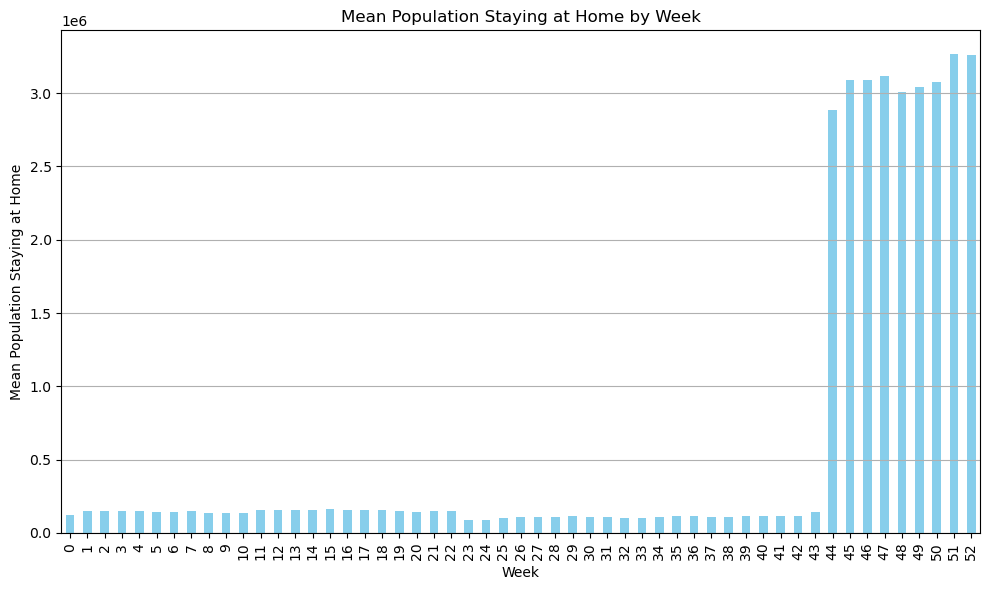

In [73]:
# Group by 'Week' and calculate the mean of 'Population Staying at Home'
mean_population_at_home = trips_filtered.groupby(by='Week')['Population Staying at Home'].mean()

# Plot the histogram
mean_population_at_home.plot(kind='bar', figsize=(10, 6), color='skyblue')

# Customize the plot
plt.title('Mean Population Staying at Home by Week')
plt.xlabel('Week')
plt.ylabel('Mean Population Staying at Home')
plt.xticks(rotation=90)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

In [82]:
trips_filtered

In [65]:
trips_full.rename(columns={'Week of Date': 'Week'}, inplace=True)

In [ ]:
trips_full

In [57]:
trips_full

,Month of Date,Week of Date,Year of Date,Level,Date,Week Ending Date,Trips <1 Mile,People Not Staying at Home,Population Staying at Home,Trips,Trips 1-25 Miles,Trips 1-3 Miles,Trips 10-25 Miles,Trips 100-250 Miles,Trips 100+ Miles,Trips 25-100 Miles,Trips 25-50 Miles,Trips 250-500 Miles,Trips 3-5 Miles,Trips 5-10 Miles,Trips 50-100 Miles,Trips 500+ Miles
0,August,Week 32,2019,National,8/4/2019 0:00,10-Aug-19,292959749,258404133,67763287,1322685497,934957837,346577279,200922270,8595827,15338786,79429125,59517188,2273613,171336406,216121882,19911937,4469346
1,August,Week 32,2019,National,8/5/2019 0:00,10-Aug-19,317133861,262199758,63967662,1412564488,996863262,358008909,228809869,6535920,12563068,86004297,68184743,1941260,178996059,231048425,17819554,4085888
2,August,Week 32,2019,National,8/6/2019 0:00,10-Aug-19,324443205,260096133,66071287,1437762102,1014614495,366533991,235621127,5993704,11104823,87599579,70149166,1741994,179210645,233248732,17450413,3369125
3,August,Week 32,2019,National,8/7/2019 0:00,10-Aug-19,358483024,258878802,67288618,1543710309,1084498325,401474049,249988663,5379881,8528574,92200386,74381367,1272248,189163336,243872277,17819019,1876445
4,August,Week 32,2019,National,8/8/2019 0:00,10-Aug-19,300765870,262410045,63757375,1382044815,984193010,347857770,226055368,6259735,12892348,84193587,66724543,1957888,179346163,230933709,17469044,4674725
5,August,Week 32,2019,National,8/9/2019 0:00,10-Aug-19,341515854,272101417,54066003,1501571863,1052793819,378936486,245571995,7635743,12256537,95005653,74512584,1823661,186257669,242027669,20493069,2797133
6,August,Week 32,2019,National,8/10/2019 0:00,10-Aug-19,346532975,267638064,58529356,1491503216,1040967509,386948113,230580285,7550100,12173176,91829556,70644329,1794030,186580557,236858554,21185227,2829046


In [66]:
columns_to_process = ['Trips 1-25 Miles', 'Trips 1-3 Miles', 'Trips 10-25 Miles', 
                      'Trips 100-250 Miles', 'Trips 100+ Miles', 'Trips 25-100 Miles', 
                      'Trips 25-50 Miles', 'Trips 250-500 Miles', 'Trips 3-5 Miles', 
                      'Trips 5-10 Miles', 'Trips 50-100 Miles', 'Trips 500+ Miles']

# Iterate over each column and apply the code
for column in columns_to_process:
    # Calculate the number of unique values
    unique_count = trips_full[column].nunique()
    print(f"Number of unique values in '{column}': {unique_count}")
    
    # Group by 'Week of Date' and calculate the mean of the column
    mean_by_week = trips_full.groupby(by='Week')[column].mean()
    print(f"Mean of '{column}' by 'Week':\n{mean_by_week}\n")

Number of unique values in 'Trips 1-25 Miles': 7
Mean of 'Trips 1-25 Miles' by 'Week':
Week
Week 32    1.015555e+09
Name: Trips 1-25 Miles, dtype: float64

Number of unique values in 'Trips 1-3 Miles': 7
Mean of 'Trips 1-3 Miles' by 'Week':
Week
Week 32    3.694767e+08
Name: Trips 1-3 Miles, dtype: float64

Number of unique values in 'Trips 10-25 Miles': 7
Mean of 'Trips 10-25 Miles' by 'Week':
Week
Week 32    231078511.0
Name: Trips 10-25 Miles, dtype: float64

Number of unique values in 'Trips 100-250 Miles': 7
Mean of 'Trips 100-250 Miles' by 'Week':
Week
Week 32    6850130.0
Name: Trips 100-250 Miles, dtype: float64

Number of unique values in 'Trips 100+ Miles': 7
Mean of 'Trips 100+ Miles' by 'Week':
Week
Week 32    1.212247e+07
Name: Trips 100+ Miles, dtype: float64

Number of unique values in 'Trips 25-100 Miles': 7
Mean of 'Trips 25-100 Miles' by 'Week':
Week
Week 32    8.803745e+07
Name: Trips 25-100 Miles, dtype: float64

Number of unique values in 'Trips 25-50 Miles': 7
Mea